In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = pd.read_csv('/home/vbinkeri/Documents/IDS/project/data/covid_data_22-09-2021_2-full.csv')
print(data.shape)
data.head()

(149, 13)


,Unnamed: 0,Country,Confirmed,proportion infected,Deaths,GDP,Population Density,2021 Population,Area,Literacy,Employment,Population 65 +,Foreigners
0,0,Albania,165096,5746.60,2601,14.80,100,2872933,28748,0.972489,0.707484,0.147591,0.018337
1,1,Algeria,202122,453.02,5739,145.00,19,44616624,2381741,0.774214,0.896187,0.053393,0.003512
2,2,Antigua and Barbuda,2625,2658.74,57,1.42,223,98731,442,0.990000,0.994403,0.088592,0.296995
3,3,Argentina,5245265,11501.30,114684,383.00,16,45605826,2780400,0.980849,0.938704,0.116861,0.045017
4,4,Armenia,254709,8581.47,5181,12.65,100,2968127,29743,0.996145,0.783675,0.119087,0.065531


In [3]:
y = data['Confirmed']
x1 = data['GDP']
x2 = data['2021 Population']

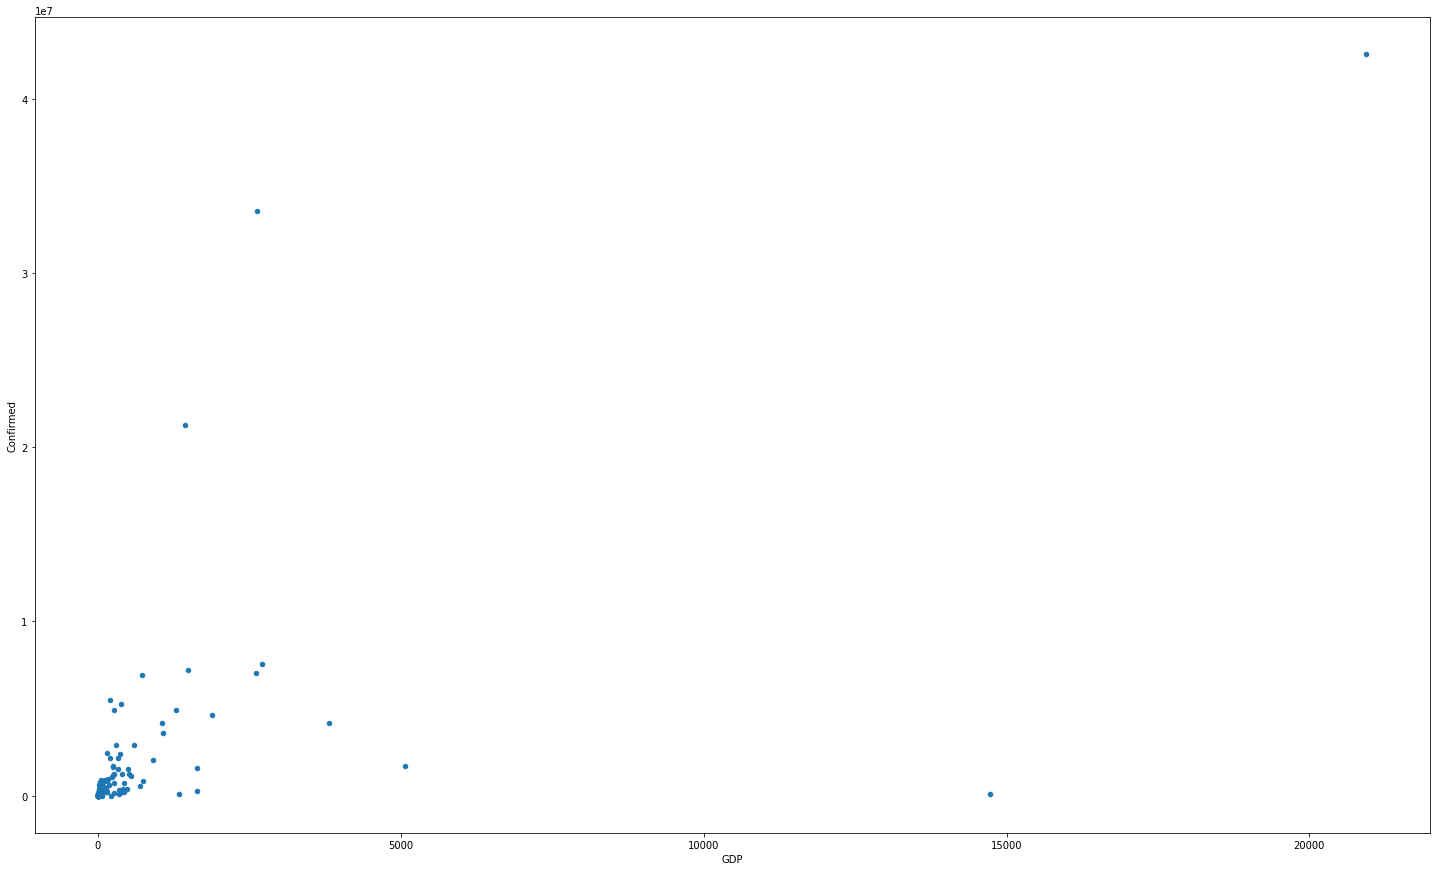

In [5]:
data.plot(kind = 'scatter', x = 'GDP', y = 'Confirmed',figsize=(25,15))
plt.show()

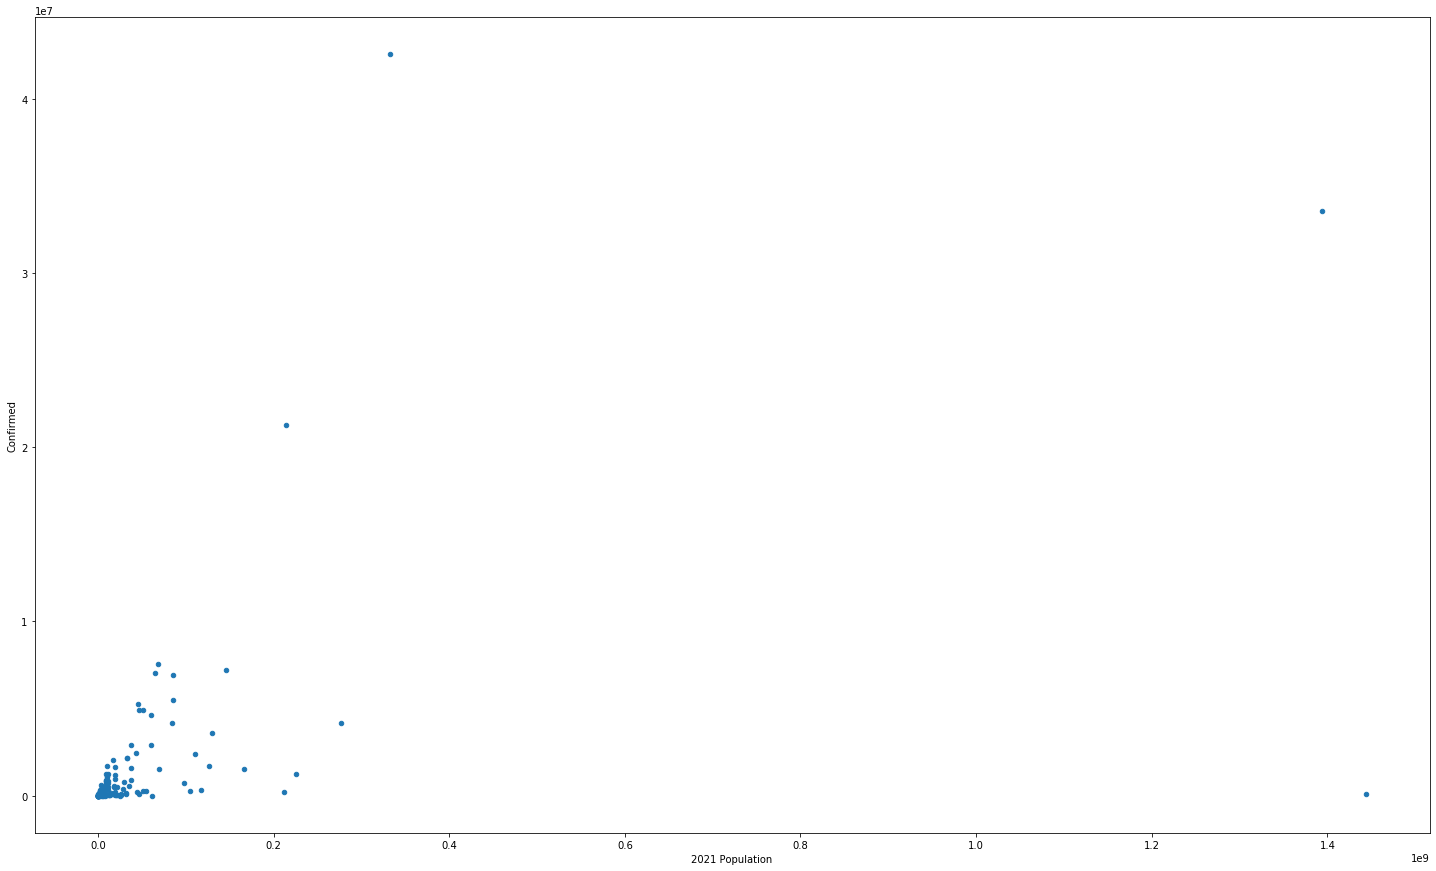

In [6]:
data.plot(kind = 'scatter', x = '2021 Population', y = 'Confirmed', figsize=(25,15))
plt.show()

In [7]:
# test train split, Confirmed and GDP
X1_train, X1_test, y_train, y_test = train_test_split(x1,y)

# test train split, Confirmed and 2021 Population
X2_train, X2_test, y_train, y_test = train_test_split(x2,y)

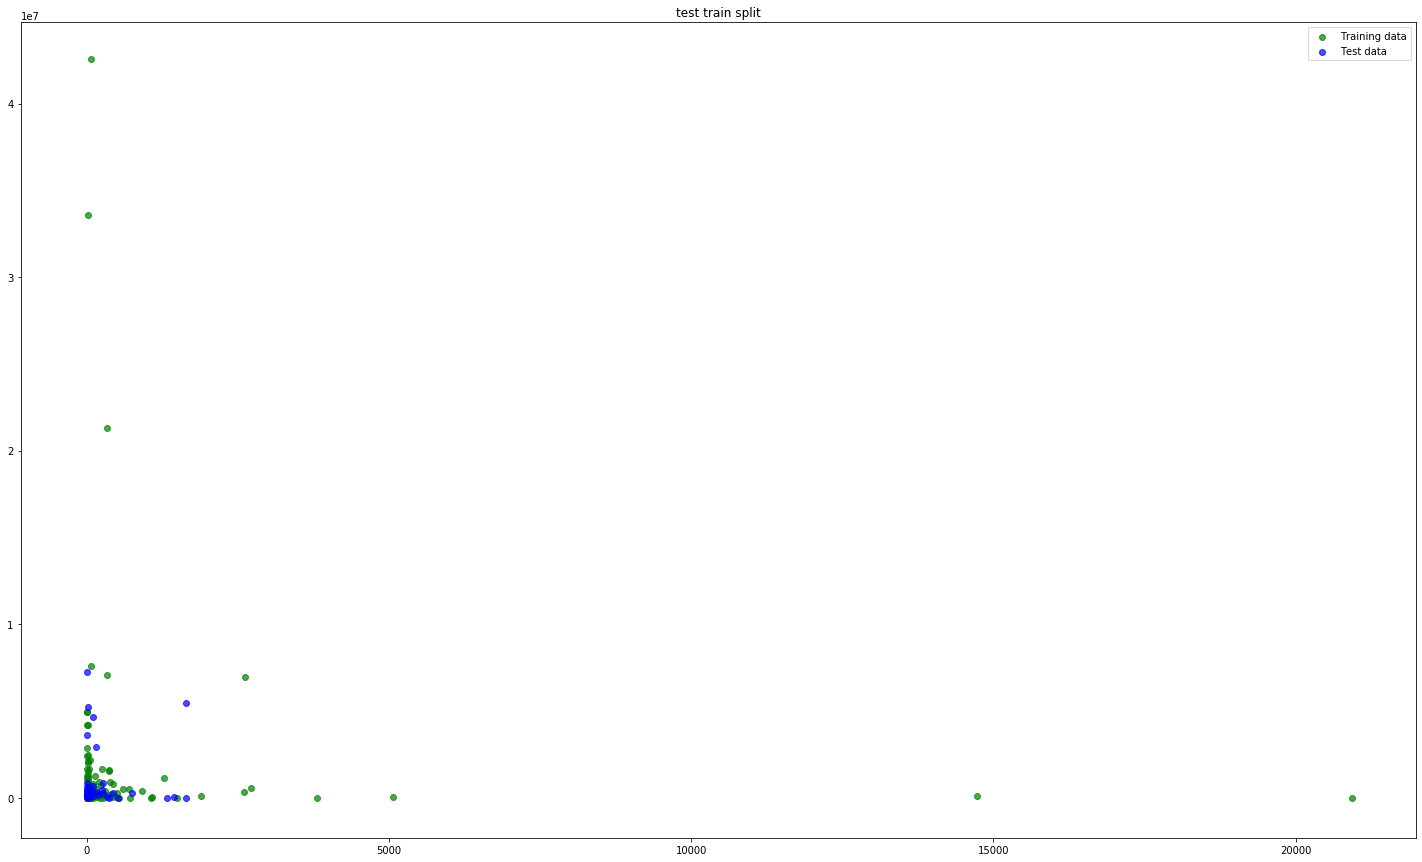

In [8]:
# visualization of Confirmed and GDP
plt.figure(figsize=(25,15))
plt.scatter(X1_train, y_train, label="Training data", color="g", alpha=.7)
plt.scatter(X1_test, y_test, label="Test data", color="b", alpha=.7)
plt.legend()
plt.title('test train split')
plt.show()

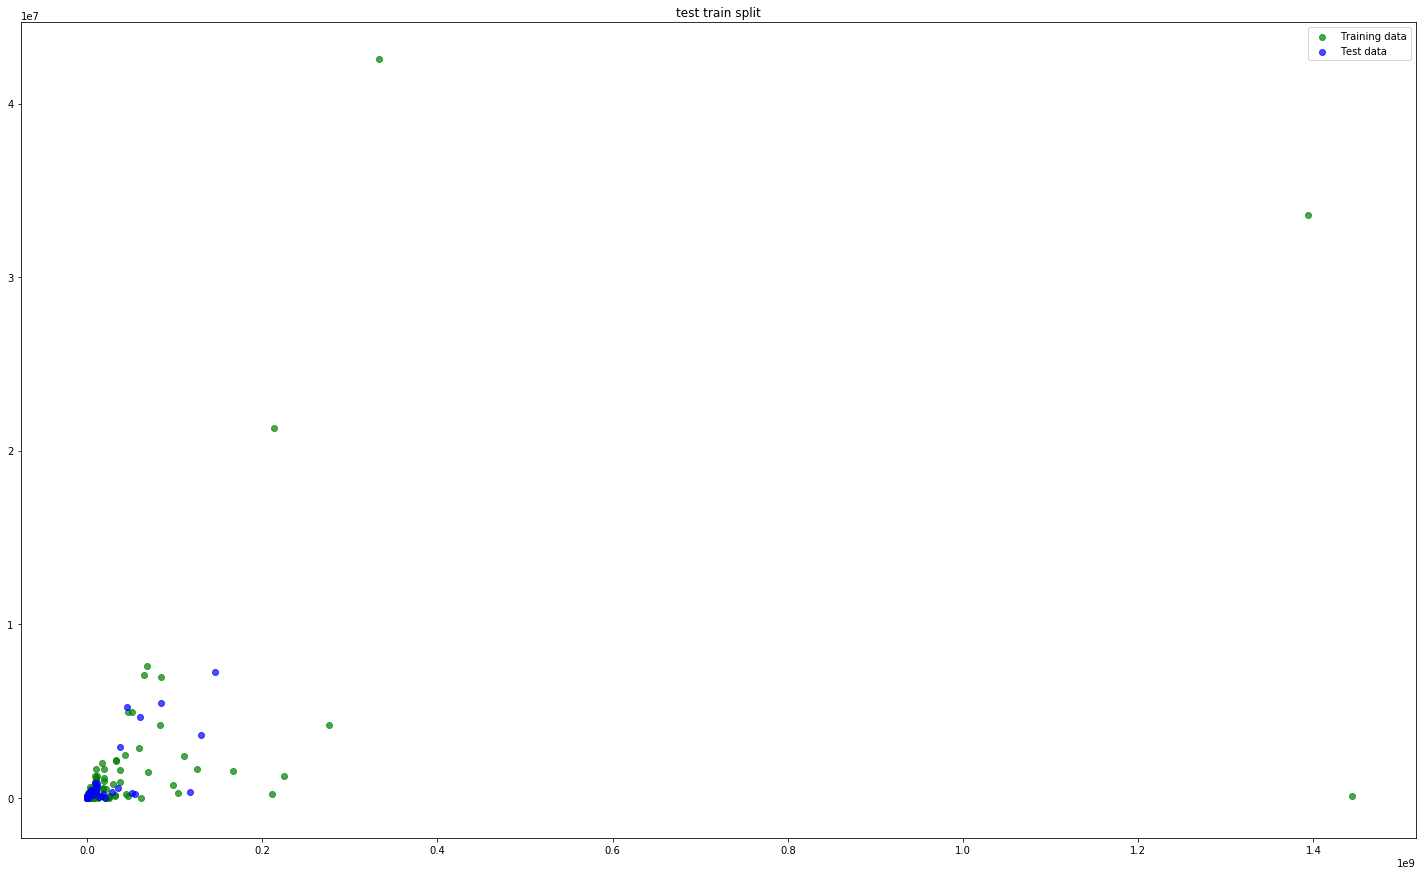

In [9]:
# visualization of Confirmation and 2021 Populations
plt.figure(figsize=(25,15))
plt.scatter(X2_train, y_train, label="Training data", color="g", alpha=.7)
plt.scatter(X2_test, y_test, label="Test data", color="b", alpha=.7)
plt.legend()
plt.title('test train split')
plt.show()

In [10]:
# linear model Confirmed & GDP
LR1 = LinearRegression()
LR1.fit(X1_train.values.reshape(-1,1), y_train.values)

# linear model Confirmed & 2021 Populations
LR2 = LinearRegression()
LR2.fit(X2_train.values.reshape(-1,1), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<function matplotlib.pyplot.show(*args, **kw)>

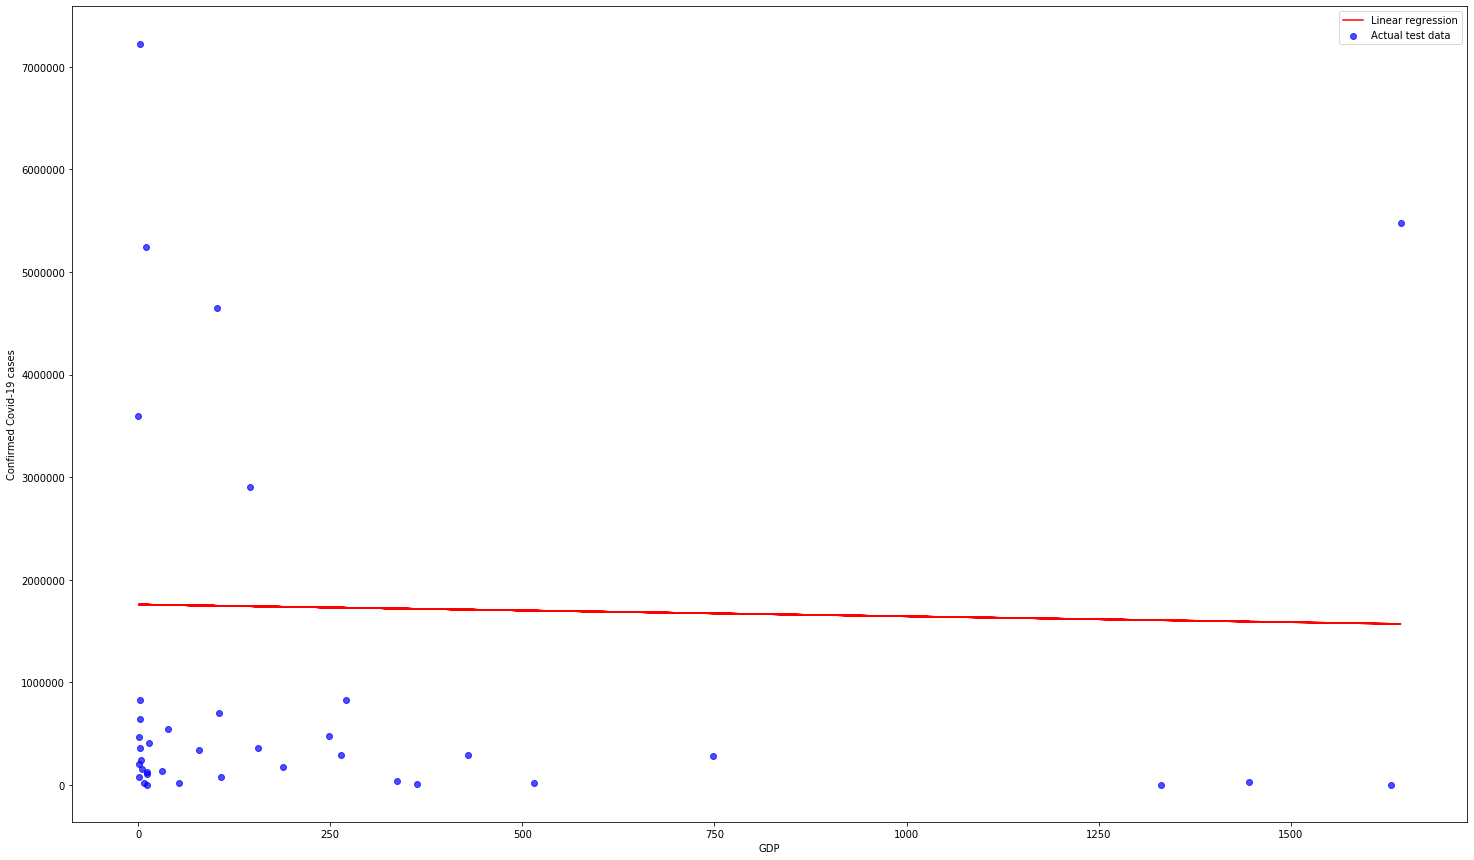

In [15]:
# predict Confirmed & GDP
prediction1 = LR1.predict(X1_test.values.reshape(-1,1))

# plot of prediction
plt.figure(figsize=(25,15))
plt.plot(X1_test, prediction1, label='Linear regression', color='r')
plt.scatter(X1_test, y_test, label='Actual test data', color='blue', alpha=.7)
plt.xlabel("GDP")
plt.ylabel("Confirmed Covid-19 cases")
plt.legend()
plt.show

In [12]:
# scoring the model LR1
LR1.score(X1_test.values.reshape(-1,1), y_test.values)

-0.17790251530788082

<function matplotlib.pyplot.show(*args, **kw)>

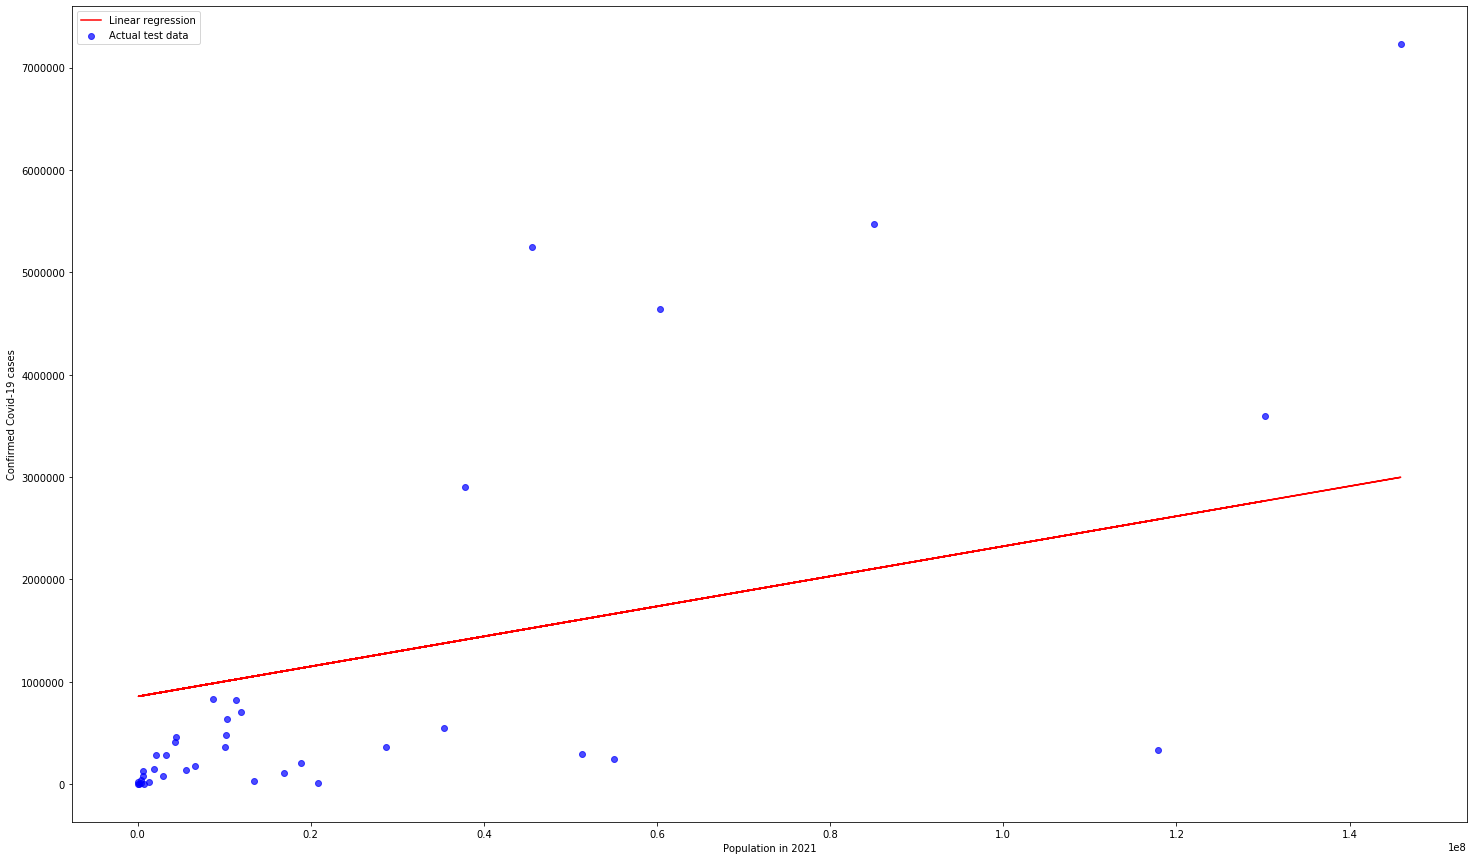

In [16]:
# predict Confirmed & 2021 Population
prediction2 = LR2.predict(X2_test.values.reshape(-1,1))

# plot of prediction
plt.figure(figsize=(25,15))
plt.plot(X2_test, prediction2, label='Linear regression', color='r')
plt.scatter(X2_test, y_test, label='Actual test data', color='blue', alpha=.7)
plt.xlabel("Population in 2021")
plt.ylabel("Confirmed Covid-19 cases")
plt.legend()
plt.show

In [17]:
# scoring the model LR2
LR2.score(X2_test.values.reshape(-1,1), y_test.values)

# this one's maybe alright

0.33428036660736926